# lady testing tea

Purported to be loosely based on an event in Fisher's life, the experiment is based on a claim by a lady friend of Fisher's that when presented with a cup of tea she could that she could discern whether milk or tea was poured first into her cup. In the experiment the lady is presented with 8 cups of tea, four of which have the milk poured first and four of which have the tea poured first. Fisher's lady friend is then asked to select which cups have the milk poured first. The probability of the lady being able to select the four cups, with milk poured first, correctly is low enough that this outcome would be unlikely. Therefore, if over multiple runs of the experiment if the lady correctly selects the cups with milk poured in first, a statistical unlikelihood, the lady had the ability to discern the order in which tea and milk were poured in the cup.



Problem Statement
Suppose the Lady Tasting Tea experiment is altered to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims that they have the special power of being able to tell if the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

1. Calculate, using Python, the probability that they select the correct six cups.
Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups.

2. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

3. Would you accept two errors? Explain.

In [28]:
import pandas as pd 
import matplotlib.pyplot as plt 
import math 

In [29]:
total_no_cups = 12  #total number of cups 
milk_cups = 6 #cups with milk 
tea_cups = 6 #cups with tea first 

In [30]:
# Define the observed successes for both scenarios: milk-first and milk-second
observed_successes_milk_first = [6, 5, 4, 3, 2, 1, 0]
observed_successes_milk_second = [6, 5, 4, 3, 2, 1, 0]


In [31]:
# Step 3: Define a function to compute results
def compute_results(observed_successes, milk_cups, tea_cups, scenario):
    results = []
    comb_total = math.comb(total_no_cups, milk_cups)  # Total combinations for 6 out of 12 cups

    for success in observed_successes:
        errors_made = milk_cups - success
        
        # Permutations for correct identifications: P(k, k) = k!
        perms_correct = math.factorial(success) if success > 0 else 1
        
        # Probability: calculate 1 / comb_total to find the chance of randomly getting the right cups
        probability = perms_correct / comb_total
        
        # Add results to the list
        results.append({
            'Scenario': scenario,
            'Observed Successes': success,
            'Errors Made': errors_made,
            'Combinations': comb_total,
            'Permutations (Correct)': perms_correct,
            'Probability': probability
        })
    return results


In [32]:
# Step 4: Compute results for both scenarios
results_milk_first = compute_results(observed_successes_milk_first, milk_cups, tea_cups, "Milk First")
results_milk_second = compute_results(observed_successes_milk_second, milk_cups, tea_cups, "Milk Second")

# Combine both scenarios into a single DataFrame
df = pd.DataFrame(results_milk_first + results_milk_second)

# Display the DataFrame
df


,Scenario,Observed Successes,Errors Made,Combinations,Permutations (Correct),Probability
0,Milk First,6,0,924,720,0.779221
1,Milk First,5,1,924,120,0.129870
2,Milk First,4,2,924,24,0.025974
3,Milk First,3,3,924,6,0.006494
4,Milk First,2,4,924,2,0.002165
5,Milk First,1,5,924,1,0.001082
6,Milk First,0,6,924,1,0.001082
7,Milk Second,6,0,924,720,0.779221
8,Milk Second,5,1,924,120,0.129870
9,Milk Second,4,2,924,24,0.025974


when looking at null hypothesis we again need to revisit Fisher, Fisher suggested that a significance level of 0.05 (or 5%) was a reasonable criterion for rejecting the null hypothesis in many cases. His work set the standard for hypothesis testing, and it has been widely adopted ever since so we will use this here. In this task the goal is to assess whether the lady can correctly distinguish the cups. The significance level of 0.05 provides a balance between being too strict (which might overlook her ability) and too lenient (which might falsely suggest she has the ability). If the probability of her success is less than 5%, we conclude that her correct guesses are unlikely to have been due to random chance, and we reject the null hypothesis.

In [51]:
# Null Hypothesis: The lady cannot distinguish between cups with milk first and tea first.
# We reject the null hypothesis if the probability of success is low enough (e.g., below a certain significance level)
significance_level = 0.05 
rejected_null = df[df['Probability']<= significance_level]
if not rejected_null.empty:
    print("Null Hypothesis Rejected: The lady has successfully distinguished between milk-first and tea-first cups.")
else:
    print("Null Hypothesis Not Rejected: The lady has not distinguished between milk-first and tea-first cups.")


Null Hypothesis Rejected: The lady has successfully distinguished between milk-first and tea-first cups.


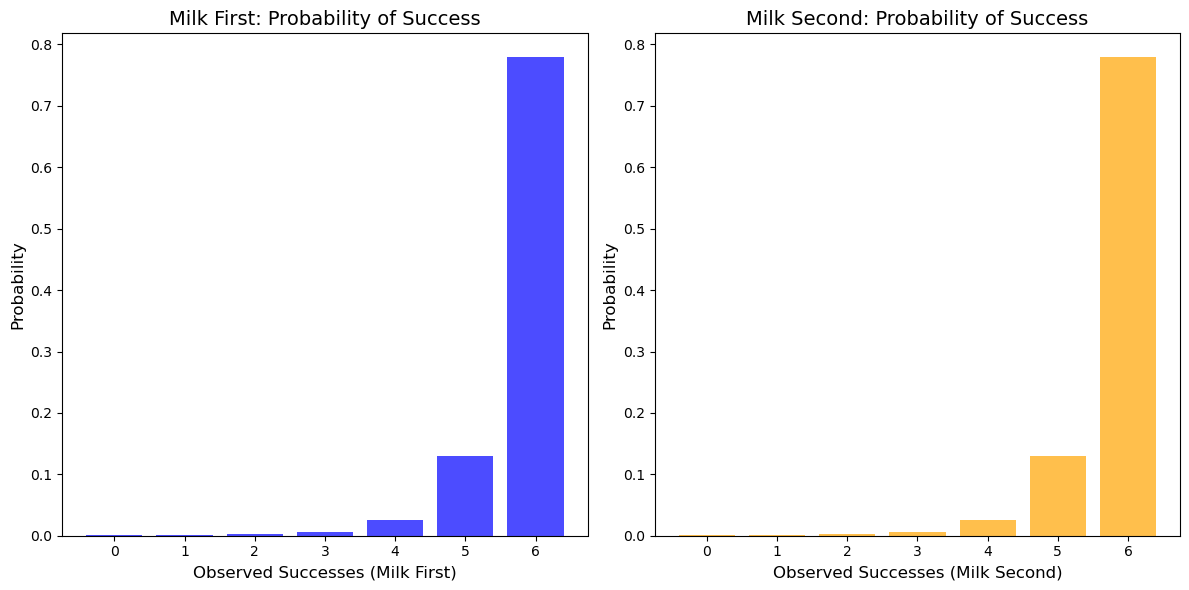

In [54]:
plt.figure(figsize=(12, 6))

# Separate milk-first and milk-second results
df_milk_first = df[df['Scenario'] == "Milk First"]
df_milk_second = df[df['Scenario'] == "Milk Second"]

# Create a subplot for Milk First
plt.subplot(1, 2, 1)
plt.bar(df_milk_first['Observed Successes'], df_milk_first['Probability'], color='blue', alpha=0.7)
plt.xlabel('Observed Successes (Milk First)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Milk First: Probability of Success', fontsize=14)

# Create a subplot for Milk Second
plt.subplot(1, 2, 2)
plt.bar(df_milk_second['Observed Successes'], df_milk_second['Probability'], color='orange', alpha=0.7)
plt.xlabel('Observed Successes (Milk Second)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Milk Second: Probability of Success', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

# Balancing Type I and Type II Errors:
1. Type I Error (False Positive): Rejecting the null hypothesis when it is actually true. In this case, concluding that the lady can distinguish between the cups when she really can't.
2. Type II Error (False Negative): Failing to reject the null hypothesis when it is false. In this case, not recognizing the lady’s ability to distinguish the cups when she can.

# conclusion 
The result of 4 out of 6 correct guesses is likely to occur by random chance, so it does not provide strong enough evidence to reject the idea that the lady is simply guessing.
If the lady had made fewer errors (such as 1 or 0 errors), it would have been more statistically significant, and we might reject the null hypothesis.

Summary:
1. Two errors (4 correct guesses) would not be enough to reject the null hypothesis.
2. The probability of making two errors by random chance is too high to conclude that the lady can reliably distinguish between milk-first and tea-first.







------------------------------------------------------------------------------------------------------

# task 2 

In [59]:
import numpy as np
import seaborn as sns

In [60]:
mean = 10.0 
std_dev = 3.0 
sample_size = 100000 
sample = np.random.normal(loc=mean, scale=std_dev, size=sample_size)
sample


array([11.72851554, 11.97660256,  7.29989233, ...,  3.58071559,
        6.99588891, 13.29393107])

<Axes: ylabel='Count'>

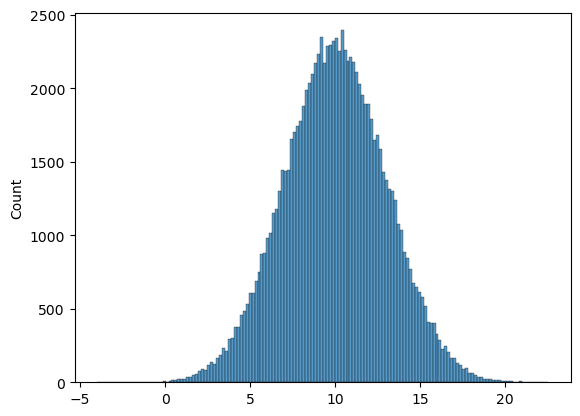

In [61]:
sns.histplot(data=sample)